<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [2]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
sb.set_style('whitegrid')
sb.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [4]:
##dataset = pd.read_csv('~marcelo.cena/violencia-institucional-2018-01.csv',
##                          encoding='utf8')
dataset = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
    encoding='utf8')

In [5]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [6]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
#dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [7]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

In [8]:
#fdpy= dataset.groupby(by="year").size().reset_index(name='counts')
fdpy=dataset.groupby(by="year", as_index=False).size().reset_index(name='counts')
fdpy

,year,counts
0,1988.0,1
1,1989.0,1
2,1990.0,5
3,1991.0,5
4,1993.0,2
5,1994.0,3
6,1996.0,1
7,1997.0,1
8,1998.0,2
9,1999.0,2


---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

Text(0.5,0,'Año')

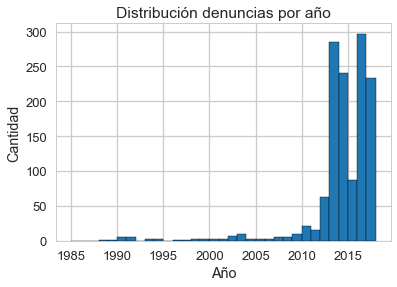

In [9]:
plt.title("Distribución denuncias por año")
plt.hist(dataset["year"].dropna(),bins=list(range(1985,2019)),edgeColor= "black")
plt.ylabel("Cantidad")
plt.xlabel("Año")
#plot = fdpy.sort_values(by='year').plot(kind='bar',title='Eventos por año')

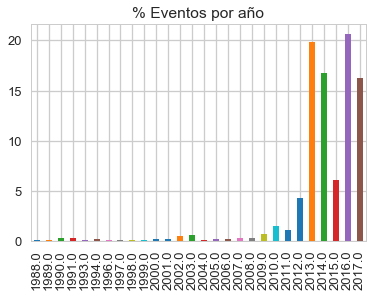

In [10]:
plot = (100*dataset['year'].value_counts()/len(dataset['año'])).sort_index().plot(kind='bar', title='% Eventos por año')


Los gráficos son similares, en nuestro punto de vista, consideramos que a los fines estadísticos es mas representativo el gráfico de cantidades, porque el de porcentajes nos abstrae de las cantidades absolutas de la ocurrencia de los eventos.

La forma de la gráfica indica un crecimiento en las denuncias de violencia institucional en los últimos 5 años, con una disminucion el año 2015 (año electoral). Estimamos que una mayor concientizacion de las personas sobre violencia institucional y como/donde denunciarla llevaron a que se informe/registre (no necesariamente que hayan ocurrido) mayor número de las mismas.
Adicionalmente hay que considerar un cambio en el paradigma cultural, algunos hechos que hasta hace pocos años se consideraban "normales" o dentro de lo esperado, ahora son considerados excesos.

Los datos faltantes pueden descartarse/ignorarse, en general se ignoran considerando que son eventos que no ocurrieron

In [11]:
dfpsanual= pd.crosstab(index=dataset["year"],
                    columns="prob")
dfpsanual=dfpsanual/dfpsanual.sum()
dfpsanual

col_0,prob
year,
1988.0,0.000760
1989.0,0.000760
1990.0,0.003799
1991.0,0.003799
1993.0,0.001520
1994.0,0.002280
1996.0,0.000760
1997.0,0.000760
1998.0,0.001520


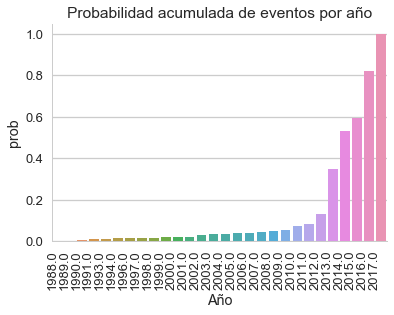

In [13]:
acumuladoanual = dataset[(dataset.year != 0 )].year.value_counts(normalize=True).to_frame().reset_index()
dfanual = acumuladoanual.sort_values('index')
dfanual['prob'] = dfanual['year'].cumsum()
ax = sb.barplot(data=dfanual,      y='prob', x='index')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Probabilidad acumulada de eventos por año')
ax.set(xlabel='Año')
sb.despine()
    

Text(0.5,0,'Año')

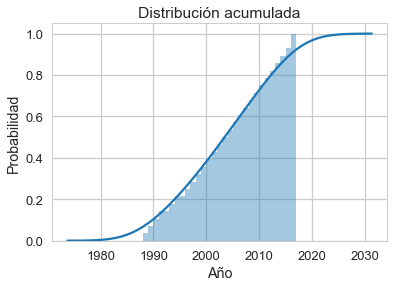

In [14]:
#otra forma sería un gráfico de distribucion acumulada continua

#plt.hist(dataset["year"].dropna()/dataset["year"].sum(),edgeColor= "black",cumulative="true")

sb.distplot(fdpy["year"].dropna(),bins=list(range(1988,2018)),
             hist_kws={'cumulative': True} ,
          kde_kws={'cumulative': True})
plt.title("Distribución acumulada")
plt.ylabel("Probabilidad")
plt.xlabel("Año")

¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

In [15]:
dfpsanual["prob"][1988:2015].sum()

0.5965045592705167

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

In [16]:
fdpp=dataset.provincia.value_counts()
fdpp.sort_index()

Buenos Aires              976
Catamarca                   2
Chaco                      29
Chubut                     37
Ciudad de Buenos Aires    117
Corrientes                  5
Córdoba                    52
Entre Rios                  9
Formosa                    10
Jujuy                       9
La Pampa                   10
La Rioja                    6
Mendoza                    17
Misiones                   11
Neuquen                    21
Rio Negro                  27
Salta                      17
San Juan                    3
San Luis                    4
Santa Cruz                  4
Santa Fe                   20
Santiago del Estero        10
Tierra del Fuego            2
Tucuman                    10
Name: provincia, dtype: int64

Para mostrar adecadamente la informacion, deberiamos poder correlacionalra con la problacion, no es lo mismo 100 denuncias en PBA/CABA/Cba que en SCruz (en términos relativos). 
Consideramos usar un gráfico de torta, pero PBA se llevaba casi toda el área y no permitia ver las provincias con menos denuncias. Por este motivo se decidió por un gráfico de barras horizontales con las provincias ordenadas alfabéticamente.

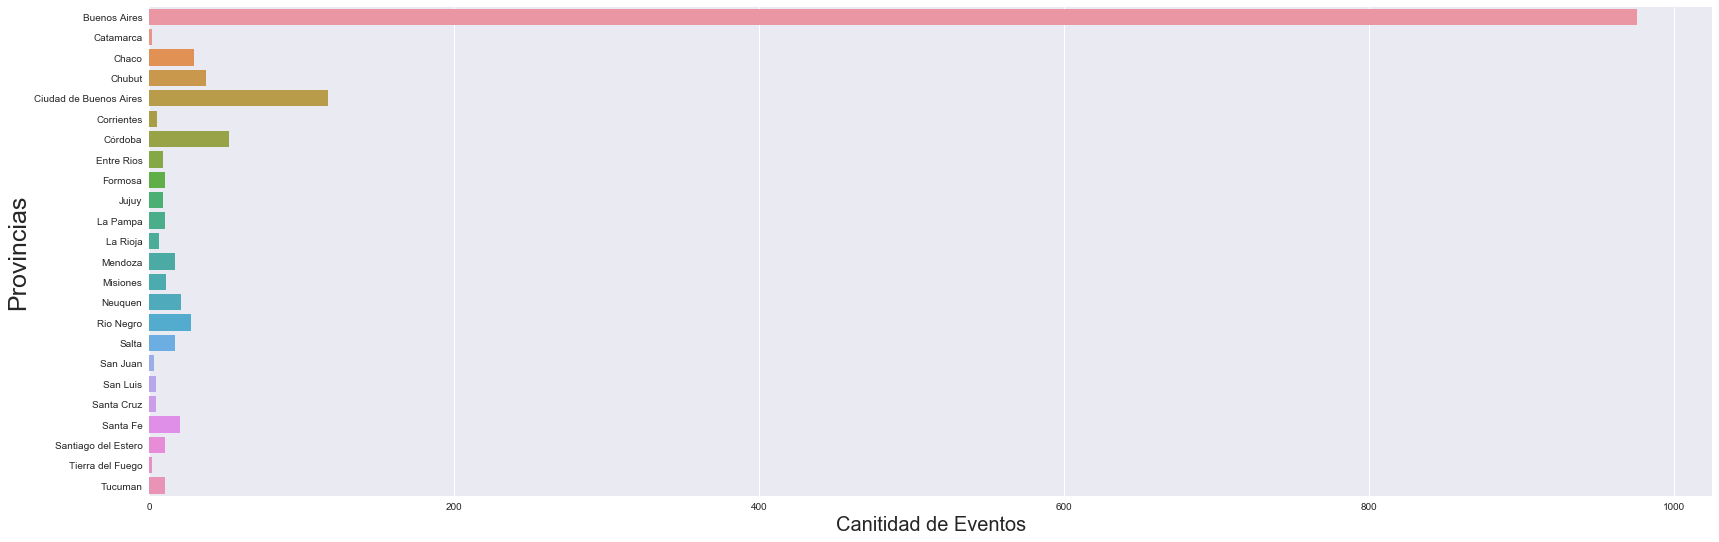

In [18]:
ax = sb.countplot(y="provincia",data=dataset.sort_values(by='provincia'))
sb.set(rc={'figure.figsize':(28,9)}) #Ajusto el tamaño de la figura
ax.set_xlabel("Canitidad de Eventos",fontsize=20)
ax.set_ylabel("Provincias",fontsize=25)
sb.despine()

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


In [19]:
tabla2e = pd.crosstab(index=dataset['provincia'],columns=dataset['year'],normalize="all")
tabla2e

year,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,0.000000,0.000766,0.000000,0.002299,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,...,0.002299,0.003065,0.006130,0.006897,0.016092,0.150192,0.125670,0.037548,0.178544,0.143295
Catamarca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000
Chaco,0.000000,0.000000,0.003065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005364,0.006130,0.002299,0.002299,0.002299,0.000766
Chubut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002299,0.000000,0.002299,0.004598,0.006897,0.001533,0.001533,0.005364
Ciudad de Buenos Aires,0.000766,0.000000,0.000000,0.001533,0.000000,0.000000,0.000766,0.000766,0.000766,0.000000,...,0.000766,0.003831,0.000766,0.001533,0.007663,0.017625,0.018391,0.007663,0.008429,0.009195
Corrientes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001533,0.000000,0.000766,0.000766,0.000000
Córdoba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001533,0.002299,0.003065,0.003831,0.003065,0.009962,0.008429,0.007663
Entre Rios,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.006130,0.000000,0.000000,0.000000
Formosa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002299,0.002299,0.000766,0.000766,0.000766


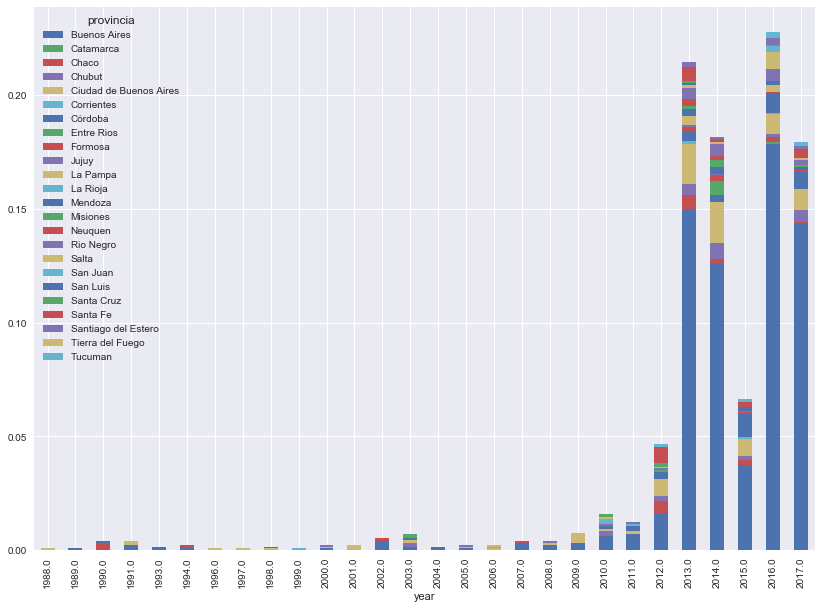

In [20]:
tabla2e.transpose().plot.bar(stacked=True,figsize=(14,10)) 

vamos a ver si un gráfico de temperatura ayuda mas que este:

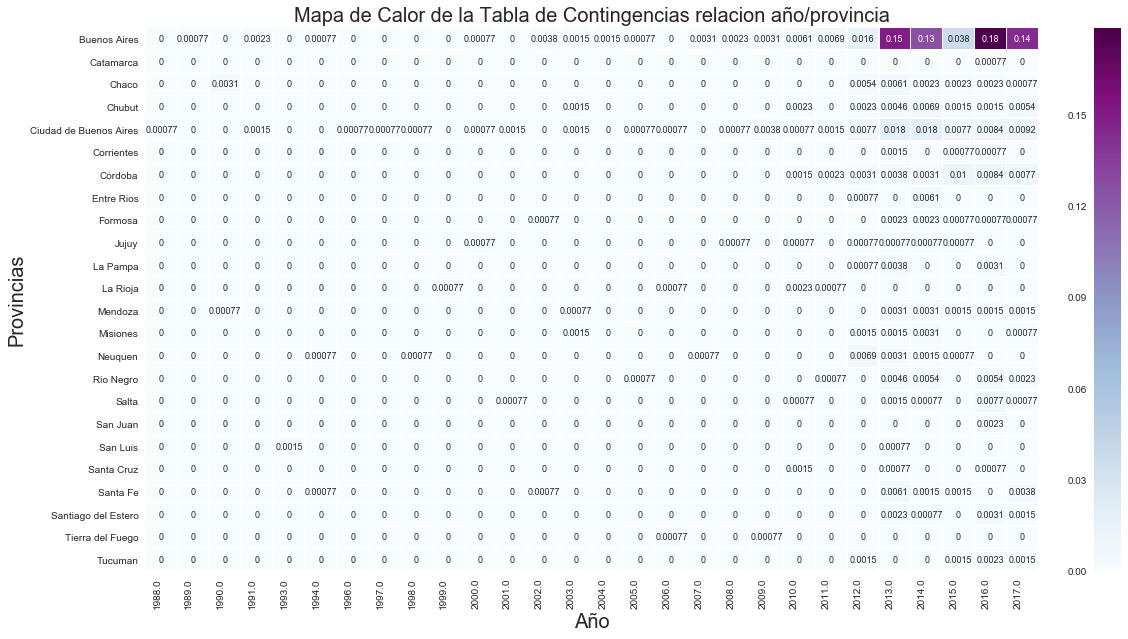

In [21]:
tabla2e_temp = pd.crosstab(index=dataset["provincia"], columns=dataset["year"],margins=False,normalize=True)
plt.figure(figsize=(20,10))
ax = sb.heatmap(tabla2e_temp,annot=True, annot_kws={"size": 9}, linewidths=.5, cmap="BuPu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("Año",fontsize=20)
plt.ylabel("Provincias",fontsize=20)
plt.title("Mapa de Calor de la Tabla de Contingencias relacion año/provincia",fontsize=20)
sb.despine()

Intuitivamente se puede inferir que las dos variables no están relacionadas, salvo que haya existido un evento político que dispare las denuncias (golpe de estado, intervención, etc, que no se han dado en estos años)  ...pero no tenemos suficientes datos como para afirmarlo. intentaremos determinarlo con mas rigurosidad.
... utilizando la funcion de correlacion no parece muy explicativo (ver abajo)... tendremos que ver de llegar a un solo número


In [22]:
tabla2e.corr()

year,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
year,,,,,,,,,,,,,,,,,,,,,
1988.0,1.000000,-0.043478,-0.053273,0.529253,-0.043478,-0.078811,1.000000,1.000000,0.691564,-0.043478,...,0.256266,0.761177,0.014781,0.147442,0.324288,0.061022,0.090530,0.133384,-0.006215,0.012646
1989.0,-0.043478,1.000000,-0.053273,0.824651,-0.043478,0.551677,-0.043478,-0.043478,-0.062869,-0.043478,...,0.903674,0.595102,0.842528,0.921512,0.802567,0.992509,0.987815,0.949378,0.997217,0.996255
1990.0,-0.053273,-0.053273,1.000000,-0.075405,-0.053273,-0.096565,-0.053273,-0.053273,-0.077033,-0.053273,...,-0.082631,-0.084787,-0.126777,-0.090329,0.162933,-0.029468,-0.052419,-0.021150,-0.053028,-0.058882
1991.0,0.529253,0.824651,-0.075405,1.000000,-0.061541,0.423900,0.529253,0.529253,0.338155,-0.061541,...,0.912553,0.936363,0.723900,0.866088,0.865198,0.877455,0.890174,0.881795,0.843384,0.853246
1993.0,-0.043478,-0.043478,-0.053273,-0.061541,1.000000,-0.078811,-0.043478,-0.043478,-0.062869,-0.043478,...,-0.067438,-0.069198,-0.103468,-0.073721,-0.110511,-0.057433,-0.063291,-0.075846,-0.055935,-0.054801
1994.0,-0.078811,0.551677,-0.096565,0.423900,-0.078811,1.000000,-0.078811,-0.078811,0.341882,-0.078811,...,0.464521,0.275950,0.384036,0.467707,0.587821,0.562821,0.535863,0.519903,0.534943,0.552712
1996.0,1.000000,-0.043478,-0.053273,0.529253,-0.043478,-0.078811,1.000000,1.000000,0.691564,-0.043478,...,0.256266,0.761177,0.014781,0.147442,0.324288,0.061022,0.090530,0.133384,-0.006215,0.012646
1997.0,1.000000,-0.043478,-0.053273,0.529253,-0.043478,-0.078811,1.000000,1.000000,0.691564,-0.043478,...,0.256266,0.761177,0.014781,0.147442,0.324288,0.061022,0.090530,0.133384,-0.006215,0.012646
1998.0,0.691564,-0.062869,-0.077033,0.338155,-0.062869,0.341882,0.691564,0.691564,1.000000,-0.062869,...,0.136522,0.500300,-0.064121,0.053300,0.437483,0.014274,0.028961,0.056727,-0.044934,-0.030478


In [35]:
import scipy.stats as stats

#Chi-Squared Test of Independence
tabla2e = pd.crosstab(index=dataset['provincia'],columns=dataset['year'],margins=False,normalize=True)
g, p, dof, expctd = stats.chi2_contingency(observed=tabla2e)

print("\nTest Chi-Cuadrado:")
print("\nEl valor de chi2 = "+str(g))
print("El valor de p = "+str(p))
print("El valor de dof = "+str(dof))
print("el valdor de expctd = "+str(expctd))


Test Chi-Cuadrado:

El valor de chi2 = 1.9515270048123126
El valor de p = 1.0
El valor de dof = 621
el valdor de expctd = [[5.24948254e-04 5.24948254e-04 2.62474127e-03 2.62474127e-03
  1.04989651e-03 1.57484476e-03 5.24948254e-04 5.24948254e-04
  1.04989651e-03 5.24948254e-04 1.57484476e-03 1.57484476e-03
  3.67463778e-03 4.72453428e-03 1.04989651e-03 1.57484476e-03
  1.57484476e-03 2.62474127e-03 2.62474127e-03 5.24948254e-03
  1.10239133e-02 8.39917206e-03 3.20218435e-02 1.46985511e-01
  1.24412736e-01 4.56704981e-02 1.55909631e-01 1.22837891e-01]
 [5.87190441e-07 5.87190441e-07 2.93595220e-06 2.93595220e-06
  1.17438088e-06 1.76157132e-06 5.87190441e-07 5.87190441e-07
  1.17438088e-06 5.87190441e-07 1.76157132e-06 1.76157132e-06
  4.11033308e-06 5.28471396e-06 1.17438088e-06 1.76157132e-06
  1.76157132e-06 2.93595220e-06 2.93595220e-06 5.87190441e-06
  1.23309993e-05 9.39504705e-06 3.58186169e-05 1.64413323e-04
  1.39164134e-04 5.10855683e-05 1.74395561e-04 1.37402563e-04]
 [1.702

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

Esta cuestion podemos analizarla desde dos puntos de vista: desde el lugar donde se produjo (contexto1) o desde la situacion donde se produjo (contexto)

In [23]:
dataset["contexto1"].unique() 

array(['Penal / Complejo Penitenciario PROVINCIAL', 'Comisaría',
       'Penal / Complejo Penitenciario FEDERAL', 'Espacio Público',
       'Instalaciones de la Gendarmería Nacional', 'Domicilio Particular',
       'Hospital General',
       'Centros de Detención Previos al Juicio (Alcaidia)', nan,
       'Lugar No Identificado',
       'Móviles y medios de transporte de Fuerzas de Seguridad',
       'Centros de Alojamiento para Personas Menores de Edad',
       'Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)',
       'Escuelas de Formación Fuerzas Nacionales',
       'Establecimiento de Salud Mental',
       'Escuelas de Formación Fuerzas Provinciales',
       'Establecimiento de Rehabilitación de Adicciones',
       'Centros de Detención Preventiva'], dtype=object)

In [24]:
lugar = dataset[dataset['contexto1'].str.contains("Penal|Fuerza|Gendarme|Alcaidia|Comisaría|Detención|Alojamiento|Formación",na=False)].shape[0]
lugar

1125

In [25]:
fdpz1= lugar/ dataset["contexto1"].dropna().shape[0] #probabilidad que el hecho sea producido en una situacion de detencion/internacion 
fdpz1

0.8122743682310469

In [26]:
dataset["contexto"].unique() 

array(['Situaciones de Detención', 'Situaciones de Tránsito',
       'Situaciones de Internación', nan,
       'Situaciones Fomación, Entrenamiento y/o Rehabilitación'],
      dtype=object)

In [27]:
detencion = dataset[dataset['contexto'].str.contains("Detención|Internación",na=False)].shape[0] #seleccionando los casos por su contexto/situacion
detencion

1164

In [28]:
fdpz= detencion/ dataset["contexto"].dropna().shape[0] #probabilidad que el hecho sea producido en una situacion de detencion/internacion 
fdpz

0.8332140300644237

en ambos casos se observan probabilidades muy similares alrededor del 84%

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

In [29]:
db_vpsiq = dataset['violencia_psiquica'].dropna()
vpsiq = len(db_vpsiq[db_vpsiq != 'Ninguno']) / len(dataset)
db_fisic = dataset['violencia_fisica'].dropna()
fisic = len(db_fisic[db_fisic != 'Ninguno']) / len(dataset)
inters = vpsiq *fisic

print ("Porcentaje de hechos de violencia psíquica: {}".format(vpsiq))
print ("Porcentaje de hechos de violencia física: {}".format(fisic))
print ("Porcentaje de hechos de violencia psíquica habiendo ocurrido violencia física: {}".format(inters))

Porcentaje de hechos de violencia psíquica: 0.33634468380820015
Porcentaje de hechos de violencia física: 0.4065323141070188
Porcentaje de hechos de violencia psíquica habiendo ocurrido violencia física: 0.13673498264614115


sin eliminar los vacios, existe un 13 % de probabilidades de que haya los dos tipos de violencia


In [30]:
psyc_fisc = dataset[['violencia_fisica', 'violencia_psiquica']].dropna()
interseccion = psyc_fisc[psyc_fisc.violencia_fisica != 'Ninguno'][psyc_fisc.violencia_psiquica != 'Ninguno']
p_psyc_phisc_violence = len(interseccion) / len(dataset) 
p_psyc_phisc_violence

C:\Users\marcelo.cena\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.08617095205003475

Existe el 8.6% de posibilidades de que habiendo violencia física haya violencia psíquica